# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
abalone = pd.read_csv('./data/abalone.csv')
abalone

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


## Exploratory Data Analysis
### Basic Statistics


In [4]:
# EDA 1
# Define a function to print basic stats
def get_basic_stats(df, name):
    print(f'--------<{name}>--------')
    print('\n----------------------------------------------------')
    print(f'{name} has {df.shape[0]} rows')
    print(f'{name} has {df.shape[1]} columns')
    print('\n----------------------------------------------------')
    print(df.info())
    print('\n----------------------------------------------------')
    print(df.describe(include='all'))
    print('\n')
    
dfs = [abalone]
names = ['abalone']  
for df, name in list(zip(dfs, names)):
    get_basic_stats(df, name)

--------<abalone>--------

----------------------------------------------------
abalone has 4177 rows
abalone has 10 columns

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB
None

----------------------------------------------------
         sex       length     diameter       height     whole_wt   shucked_wt  \
count   4177  4177

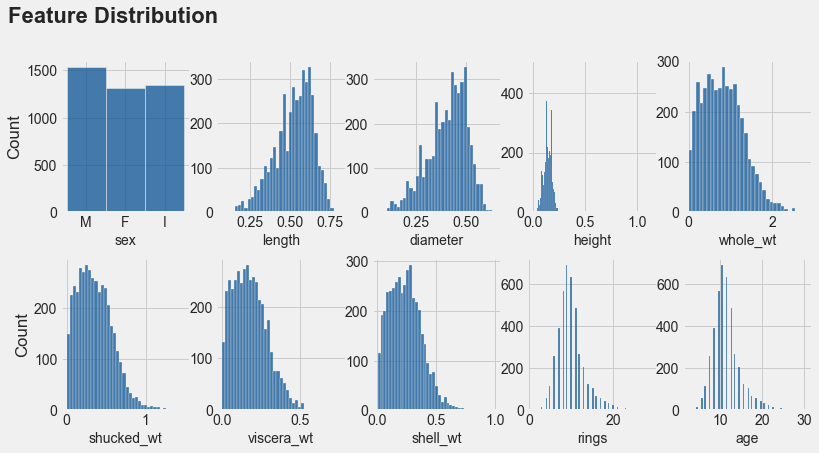

In [20]:
#EDA 2
# 2022/08/24 
# Check distribution 
i = 2
j = 5
r, c = 0, 0

plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(i, j, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3)
axs[0][0].text(-2, 2000, "Feature Distribution", fontsize=22, weight='bold',color='#252525')
cols = abalone.columns
idx = 0
while r < i:
    while c < j:
        axs[r][c] = sns.histplot(abalone[cols[idx]], ax=axs[r][c], color='#0B5394')
        axs[r][c].set_xlabel(cols[idx], fontsize=14)
        if c != 0:
            axs[r][c].set_ylabel("");
        c += 1
        idx += 1
    r += 1
    c = 0

## Scatter Plot

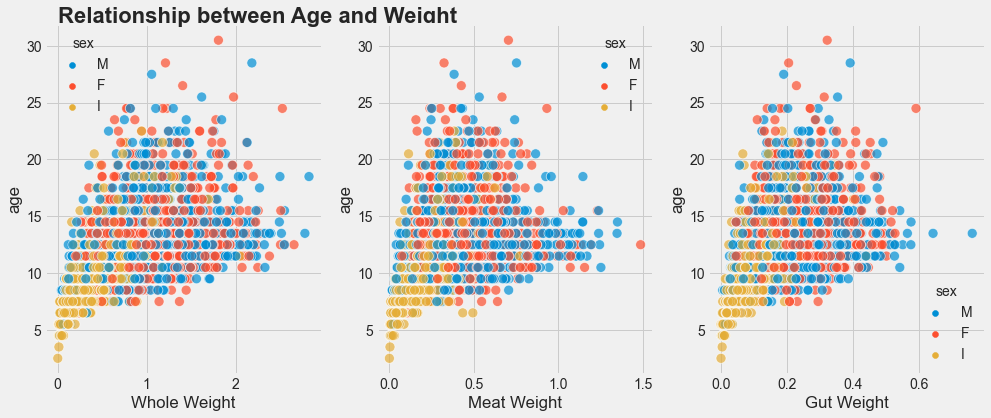

In [39]:
# Draw scatterplot
plt.style.use('fivethirtyeight')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
plt.subplots_adjust(hspace=0.3)
ax1.text(0, 32, "Relationship between Age and Weight", fontsize=22, weight='bold',color='#252525')

sns.scatterplot(x='whole_wt', y='age', data=abalone, hue='sex', ax=ax1, alpha=0.7, s=100)
sns.scatterplot(x='shucked_wt', y='age', data=abalone, hue='sex', ax=ax2, alpha=0.7, s=100)
sns.scatterplot(x='viscera_wt', y='age', data=abalone, hue='sex', ax=ax3, alpha=0.7, s=100)

ax1.set_xlabel('Whole Weight')
ax2.set_xlabel('Meat Weight')
ax3.set_xlabel('Gut Weight');

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

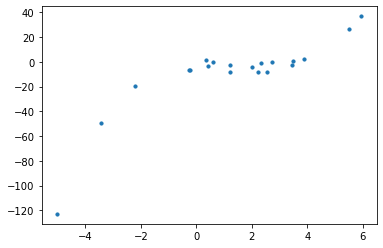

In [7]:
plt.scatter(x, y, s=10)
plt.show()

In [42]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

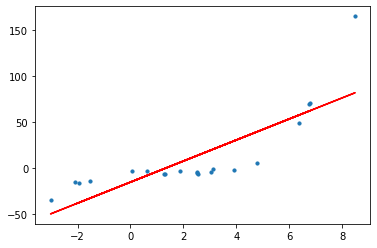

In [43]:
y_pred = model.predict(x)
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [45]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(x, y)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(x, y)

print('RMSE value:', rmse)
print('R2 value: ', r2)

RMSE value: 42.534681719069944
R2 value:  -184.13887640221498


In [50]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features1 = PolynomialFeatures(degree=2)
x_poly1 = polynomial_features1.fit_transform(x)
model1 = LinearRegression()
model1.fit(x_poly1, y)
y_poly_pred1 = model1.predict(x_poly1)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
rmse1 = np.sqrt(mean_squared_error(y, y_poly_pred1))
r21 = r2_score(y, y_poly_pred1)
print(rmse1)
print(r21)

14.295376921500557
0.894077998471772


In [20]:
x1 = x[:, np.newaxis]
x2 = x1[:, np.newaxis]
print(x1.shape)
print(x2.shape)

print(x1)

(20, 1, 1)
(20, 1, 1, 1)
[[[ 2.01778498]]

 [[ 0.35822824]]

 [[-0.22333614]]

 [[ 2.71369261]]

 [[ 1.20783762]]

 [[ 3.47175094]]

 [[ 3.45710656]]

 [[-2.21539519]]

 [[ 0.43284512]]

 [[ 5.94226432]]

 [[ 0.58480189]]

 [[ 5.50103855]]

 [[ 1.19224108]]

 [[ 2.32300911]]

 [[-5.02940088]]

 [[-3.43955039]]

 [[ 3.88568956]]

 [[ 2.53048214]]

 [[ 2.21512381]]

 [[-0.25013918]]]


In [35]:
input_line = input()
print(input_line)



3 5 6


In [37]:
s = input_line.split()
print(s)

['3', '5', '6']


## 💪 Competition challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!